In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("Data\\train_data_3sec.csv", header=0)

# Extract features and labels
features = df.iloc[:, 2:-1].values  # Assuming your features start from the second column
labels = df.iloc[:, -1].values

# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = np.array(features, dtype=np.float32)
numeric_labels.shape


(7994,)

In [2]:
file_names = df.iloc[:,0].values
categories = np.array(['.'.join(name.split('.')[:2]) for name in file_names])#file_names_unique = 
unique_values, counts = np.unique(categories, return_counts=True)
unique_categories_with_indices = list(enumerate(unique_values))
first_instance_indices = {category: np.where(categories == category)[0][0] for category in unique_values}
counts_dict = dict(zip(range(len(unique_values)), [(count, first_instance_indices[category]) for category, count in zip(unique_values, counts)]))
print(counts_dict)

{0: (10, 0), 1: (10, 10), 2: (10, 20), 3: (10, 30), 4: (10, 40), 5: (10, 50), 6: (10, 60), 7: (10, 70), 8: (10, 80), 9: (10, 90), 10: (10, 100), 11: (10, 110), 12: (10, 120), 13: (10, 130), 14: (10, 140), 15: (10, 150), 16: (10, 160), 17: (10, 170), 18: (10, 180), 19: (10, 190), 20: (10, 200), 21: (10, 210), 22: (10, 220), 23: (10, 230), 24: (10, 240), 25: (10, 250), 26: (10, 260), 27: (10, 270), 28: (10, 280), 29: (10, 290), 30: (10, 300), 31: (10, 310), 32: (10, 320), 33: (10, 330), 34: (10, 340), 35: (10, 350), 36: (10, 360), 37: (10, 370), 38: (10, 380), 39: (10, 390), 40: (10, 400), 41: (10, 410), 42: (10, 420), 43: (10, 430), 44: (10, 440), 45: (10, 450), 46: (10, 460), 47: (10, 470), 48: (10, 480), 49: (10, 490), 50: (10, 500), 51: (10, 510), 52: (10, 520), 53: (10, 530), 54: (10, 540), 55: (10, 550), 56: (10, 560), 57: (10, 570), 58: (10, 580), 59: (10, 590), 60: (10, 600), 61: (10, 610), 62: (10, 620), 63: (10, 630), 64: (10, 640), 65: (10, 650), 66: (10, 660), 67: (10, 670), 

In [5]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import utils.n_fold_cv

X = features_array
y = numeric_labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = next(utils.n_fold_cv.n_fold_cv(X, y,counts_dict))

# Create a Decision Tree classifier with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.46

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.41      0.45       160
           1       0.72      0.77      0.74       160
           2       0.28      0.28      0.28       160
           3       0.31      0.46      0.37       160
           4       0.33      0.31      0.32       159
           5       0.56      0.61      0.58       160
           6       0.59      0.57      0.58       160
           7       0.61      0.58      0.60       160
           8       0.42      0.41      0.42       160
           9       0.33      0.24      0.28       160

    accuracy                           0.46      1599
   macro avg       0.47      0.46      0.46      1599
weighted avg       0.47      0.46      0.46      1599



In [6]:
names = df.columns[2:-1]
names

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

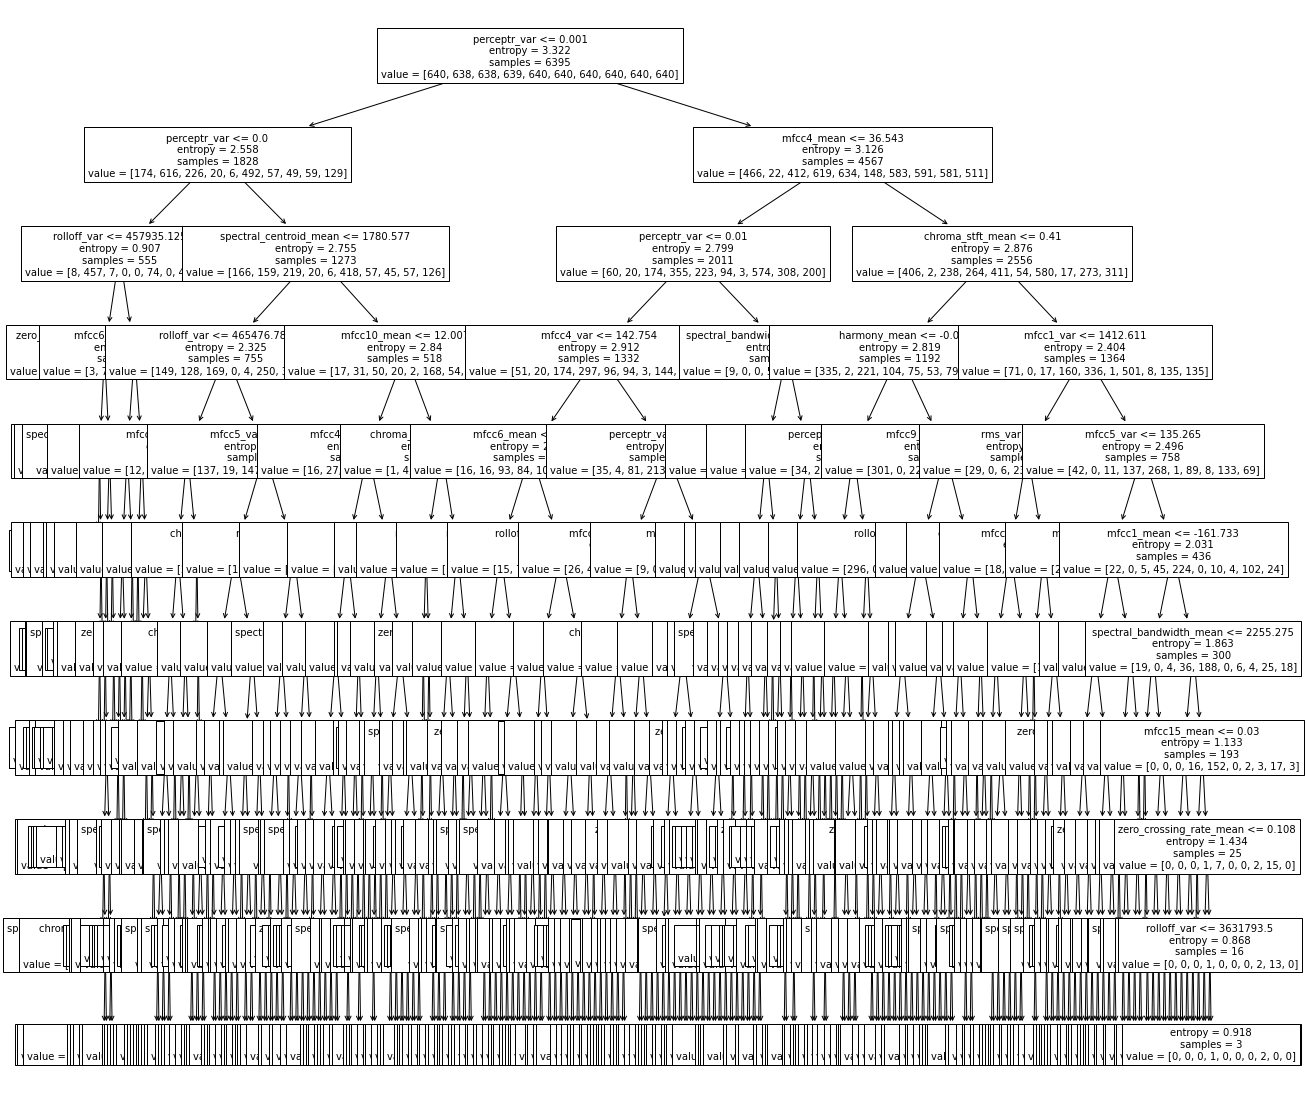

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names=names)
plt.show()

In [10]:
plt.savefig("im.png")

<Figure size 432x288 with 0 Axes>